In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers
import optuna
from sklearn.ensemble import RandomForestRegressor

In [2]:
import optuna
from sklearn.model_selection import cross_val_score

function_name = "Eggholder"

function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))


def objective(trial):
    ranges = ex_func.function_ranges[function_name]
    params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]

    param_sets = []
    
    for _ in range(20):
        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
        param_sets.append(params)
    
    rf_regressor = RandomForestRegressor(n_estimators=200)
    score = cross_val_score(rf_regressor, param_sets, [function_param(params) for params in param_sets], cv=5).mean()
    
    return score


study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

function_param([study.best_params['x0'],study.best_params['x1']])

[I 2024-05-13 22:24:03,553] A new study created in memory with name: no-name-690a10df-6ff7-4983-9cbd-3cab665aa236
C:\Users\user\AppData\Local\Temp\ipykernel_18716\2629562480.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
C:\Users\user\AppData\Local\Temp\ipykernel_18716\2629562480.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
[I 2024-05-13 22:24:04,261] Trial 0 finished with value: 0.0 and parameters: {'x0': -481.1149387287892, 'x1': -41.86951166450888}. Best is trial

Best parameters: {'x0': 278.5460355832313, 'x1': -305.4461433219892}
Best value: 1.0


0.10951687937523502

Working on function: Ackley


C:\Users\user\AppData\Local\Temp\ipykernel_18716\2575095315.py:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]


0.9190622369705637
******
******
Working on function: Bukin
0.9473277874058458
******
******
Working on function: Cross in Tray
0.9981605735565248
******
******
Working on function: Drop Wave
0.963257328310735
******
******
Working on function: Eggholder
0.9531559464636827
******
******
Working on function: Gramacy Lee
0.9999893850736875
******
******
Working on function: Holder Table
0.977470154021946
******
******
Working on function: Schaffer2
0.8990225573500912
******
******
Working on function: Schaffer4
0.7354607969720344
******
******
Working on function: Schwefel
0.9926921714524131
******
******
Working on function: Shubert
0.9460089815930162
******
******
Working on function: Bohachevsky
0.9996204029688807
******
******
Working on function: Rotated Hyper Ellipsoid
0.9997127517849904
******
******
Working on function: Sphere
0.9996457613783885
******
******
Working on function: Sum of Different Powers
0.9931910830473909
******
******
Working on function: Sum Squares
0.999784826

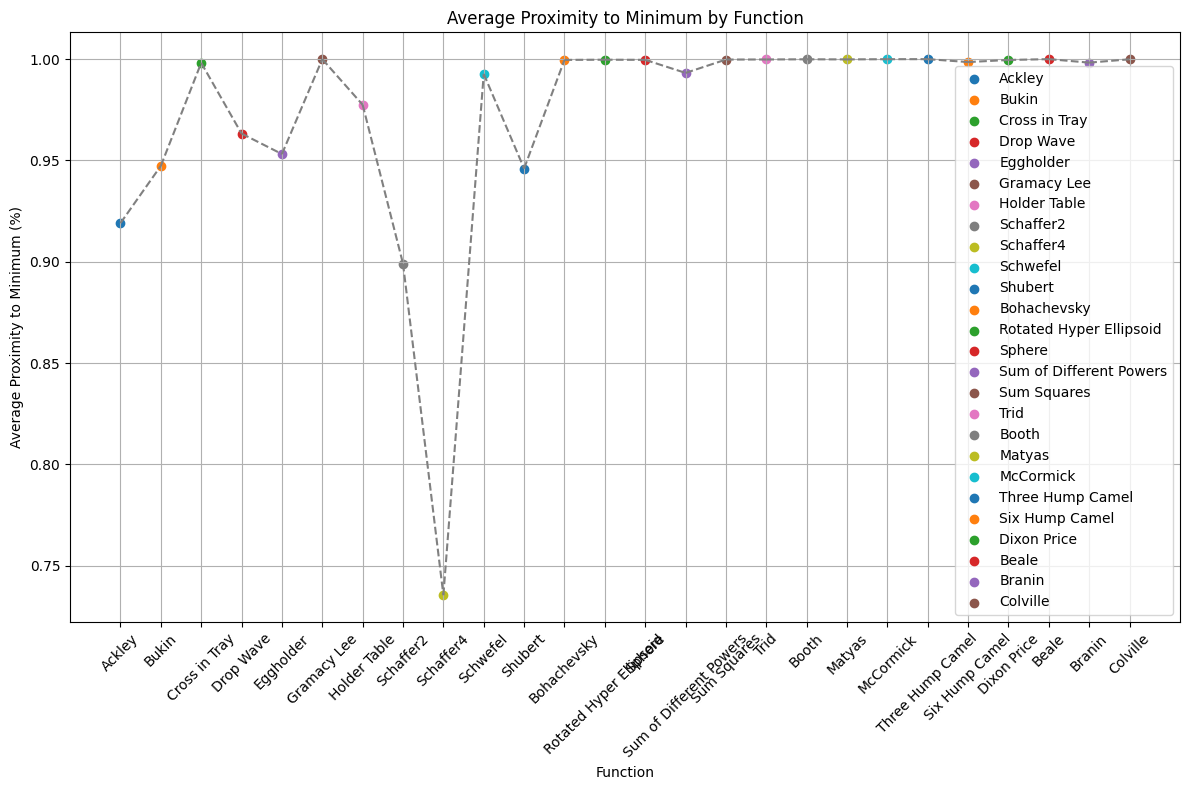

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]

                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=100)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += 100
                    minimum_value_so_far = study.best_value
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}") 
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Working on function: Bukin


C:\Users\user\AppData\Local\Temp\ipykernel_2236\2107913425.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]


******
******
******
******
0.9781901563843391
Working on function: Eggholder
******
******
******
******
0.8991105914744495


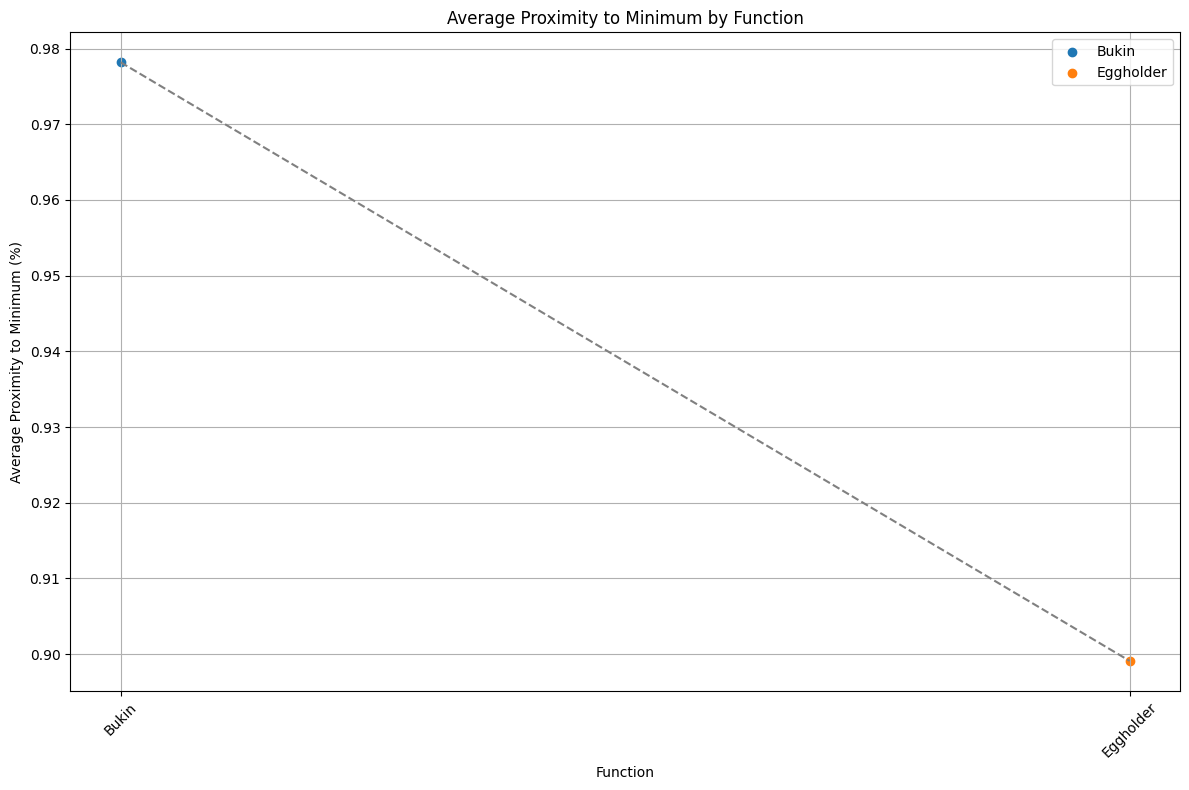

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if function_name == 'Eggholder' or function_name == 'Bukin':
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=100)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += 100
                    minimum_value_so_far = study.best_value
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")           
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

                print("******")
                print("******")
                print("******")
                print("******")
                
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
